In [93]:
import sys

sys.path.insert(0, "..")

In [94]:
from pathlib import Path

import numpy as np

from cr_knee_fit.analysis import FitConfig
from cr_knee_fit.elements import Element
from cr_knee_fit.model import Model

In [95]:
rundir = Path("../out/phase-5/direct-separate")
config = FitConfig.model_validate_json((rundir / "config-dump.json").read_text())

In [96]:
theta = np.loadtxt(rundir / "theta.txt")

labels = Model.unpack(theta[0, :], layout_info=config.model).labels(latex=True)

In [97]:
print(theta.shape)
labels

(6208, 32)


['\\lg(I_\\text{H})',
 '\\alpha_\\text{H}',
 '\\lg(R^\\text{b}_\\text{H})',
 '\\Delta \\alpha_\\text{H}',
 '\\lg(I_\\text{He})',
 '\\alpha_\\text{He}',
 '\\lg(R^\\text{b}_\\text{He})',
 '\\Delta \\alpha_\\text{He}',
 '\\lg(I_\\text{C})',
 '\\alpha_\\text{C}',
 '\\lg(R^\\text{b}_\\text{C})',
 '\\Delta \\alpha_\\text{C}',
 '\\lg(I_\\text{O})',
 '\\alpha_\\text{O}',
 '\\lg(R^\\text{b}_\\text{O})',
 '\\Delta \\alpha_\\text{O}',
 '\\lg(I_\\text{Mg})',
 '\\alpha_\\text{Mg}',
 '\\lg(R^\\text{b}_\\text{Mg})',
 '\\Delta \\alpha_\\text{Mg}',
 '\\lg(I_\\text{Si})',
 '\\alpha_\\text{Si}',
 '\\lg(R^\\text{b}_\\text{Si})',
 '\\Delta \\alpha_\\text{Si}',
 '\\lg(I_\\text{Fe})',
 '\\alpha_\\text{Fe}',
 '\\lg(R^\\text{b}_\\text{Fe})',
 '\\Delta \\alpha_\\text{Fe}',
 '\\lg(f_\\text{AMS-02})',
 '\\lg(f_\\text{CALET})',
 '\\lg(f_\\text{CREAM})',
 '\\lg(f_\\text{ISS-CREAM})']

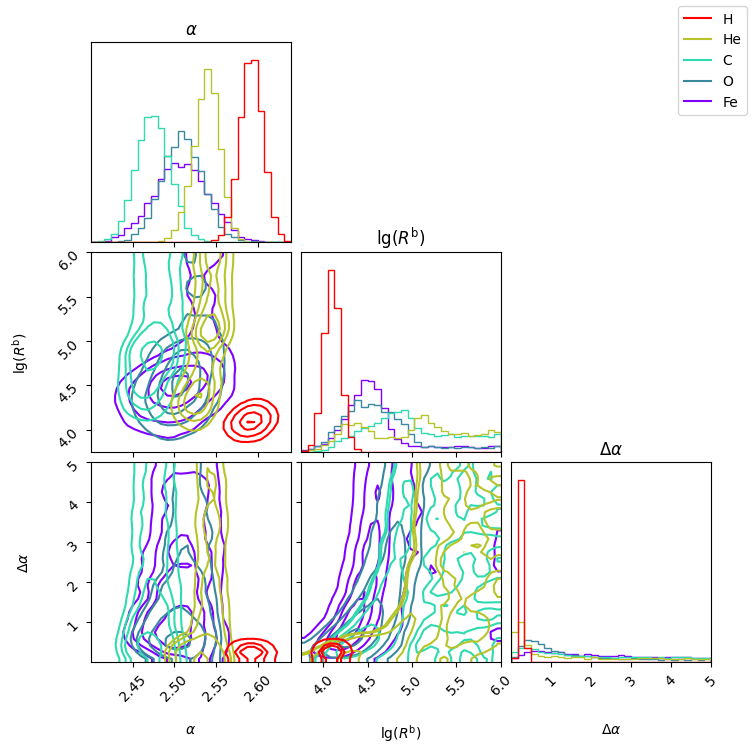

In [102]:
import corner
from matplotlib.lines import Line2D

fig = None

element_ranges = {
    Element.H: (1, 4),
    Element.He: (5, 8),
    Element.C: (9, 12),
    Element.O: (13, 16),
    # Element.Mg: (17, 20),
    # Element.Si: (21, 24),
    Element.Fe: (25, 28),
}

for element, (min, max) in reversed(element_ranges.items()):
    fig = corner.corner(
        data=theta[:, min:max],
        fig=fig,
        color=element.color,
        labels=[
            "$ \\alpha $",
            "$ \\lg(R^\\text{b}) $",
            "$ \\Delta \\alpha $",
        ],
        range=[
            (2.4, 2.64),
            (3.75, 6.0),
            (0.0, 5.0),
        ],
        bins=30,
        show_titles=True,
        title_fmt=None,  # type: ignore
        plot_datapoints=False,
        plot_density=False,
        smooth=1.0,
        # fill_contours=True,
    )

assert fig is not None

fig.legend(handles=[Line2D([], [], label=el.name, color=el.color) for el in element_ranges.keys()])